In [112]:
%matplotlib notebook

In [113]:
import matplotlib.pylab as plt
import numpy as np
from math import sqrt
from functools import partial

In [114]:
def ellx(dx, dy, a, b, y):
    try:
        return dx + a * sqrt(1 - ((y - dy) ** 2) / (b ** 2))
    except:
        return 0

In [115]:
def partell(dx, dy, a, b):
    return partial(ellx, dx, dy, a, b)

In [116]:
bx = 7
by = 12
rx = 5
ry = 15

def kick(ballx, bally, rx, ry):
    bx = ballx
    by = bally + ry
    
    path = partell(bx, by, rx, ry)
    
    y = np.linspace(by - ry, min(0.5, by + ry), num=100)
    x = np.vectorize(partell(bx, by, rx, ry))(y)

    plt.plot(x, y, color="red")

def kickblocked(ballx, bally, rx, ry, maxY):
    bx = ballx
    by = bally + ry
    
    path = partell(bx, by, rx, ry)
    
    y = np.linspace(by - ry, maxY, num=100)
    x = np.vectorize(partell(bx, by, rx, ry))(y)

    plt.plot(x, y, color="red")

    
def checkX(ballx, bally, rx, ry, ypos):
    f = partial(ellx, ballx, bally+ry, rx, ry)
    return f(ypos)

In [117]:
checkX(4, -10, 2, 15, -5)

5.49071198499986

In [118]:
def segment(ax, bx, y, color):
    # draw a line segment at height y from ax to bx
    x = np.linspace(ax, bx)
    y = np.vectorize(lambda x: y)(x)
    plt.plot(x, y, color=color)
    
# segment(2, 3, 9)

In [119]:
def field(ball, wallleft, wallsize, kickw, kickh):
    # goal line
    segment(0, 7.3, -0.1, color="orange")
    
    # open area
    segment(wallleft[0], 7.3, 0, color="yellow")
    
    # blocked
    segment(0, wallleft[0], 0, color="purple")
    
    # wall
    segment(wallleft[0], wallleft[0]+wallsize, wallleft[1], color="blue")
    
    # kick
    kick(ball[0], ball[1], kickw, kickh)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor((0.5, 0.9, 0.5))
    
    

<IPython.core.display.Javascript object>


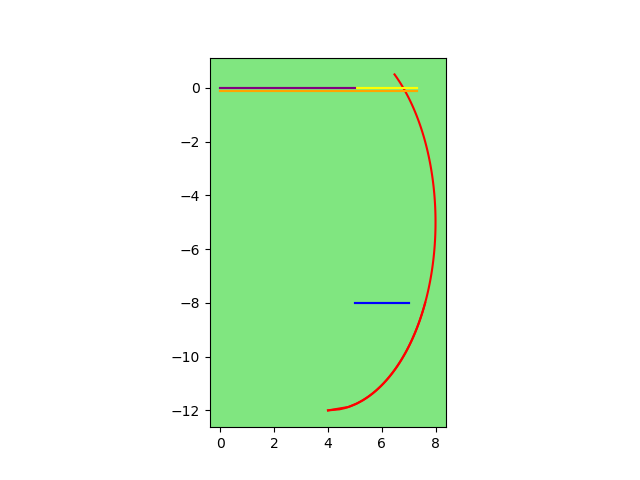

In [124]:
field([4, -12], [5, -8], 2, 4, 7)

In [121]:
field([4, -12], [5, -8], 3, 4, 7)

In [122]:
def fieldblocked(ball, wallleft, wallsize, kickw, kickh, blocky):
    # goal line
    segment(0, 7.3, -0.1, color="orange")
    
    # open area
    segment(wallleft[0], 7.3, 0, color="yellow")
    
    # blocked
    segment(0, wallleft[0], 0, color="purple")
    
    # wall
    segment(wallleft[0], wallleft[0]+wallsize, wallleft[1], color="blue")
    
    # kick
    kickblocked(ball[0], ball[1], kickw, kickh, blocky)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor((0.5, 0.9, 0.5))
    


<IPython.core.display.Javascript object>


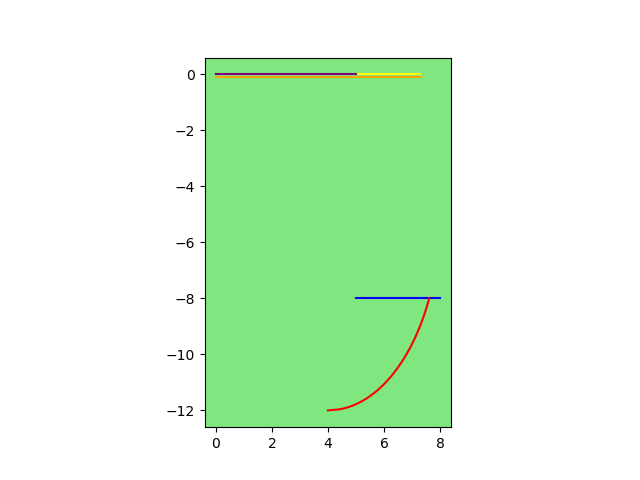

In [127]:
fieldblocked([4, -12], [5, -8], 3, 4, 7, -8)